<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/ORIG_6a_SurveyDataAnalysisGSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of General Social Survey Data

This is a public opinion data source that lends itself to all sorts of timely questions about a wide variety of topics. It is the leading public opinion data source in the US.


In [ ]:
# Code block 1a: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt


In [ ]:
# Code block 1b: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 69.5 MB/s eta 0:00:00


In [ ]:
# Code block 1c: Importing the new library
import researchpy as rp

You can download the data from https://gss.norc.org/us/en/gss/get-the-data.html and then copy the files to your Drive and read the data into your notebook.

I'll download the 2018 data -- the most recent survey year -- and read in the Stata file. Here's the codebook: http://www.gss.norc.org/get-documentation

I prefer to use the online data tool as an interactive codebook: https://gssdataexplorer.norc.org/variables/vfilter

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

In [ ]:
# Code block 2: Reading in data
# The format of this data source is an SPSS data file, .sav, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_spss. We use this to read the SPSS file into a new data object.
# I mounted my Drive in this notebook and read the file by copying the local path.
# need codebook to know what the column names mean
GSS2018_df = pd.read_stata('GSS2018.dta', convert_categoricals=False) #lose labels, keep #s - if you say cat=True - lose #s and keep labels

In [ ]:
GSS2018_df.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,prestg10,...,vpsu,wtssps,wtssnrps,fileversion,spwrkslf2,spwrkslffam,cowrkslf2,cowrkslffam,cowksup,subsamprate
0,2018,1,3.0,NaN,41.0,NaN,2.0,2.0,630.0,47.0,...,1,1.908104,2.244275,7222.4,NaN,NaN,NaN,NaN,NaN,0.5
1,2018,2,5.0,NaN,NaN,1.0,2.0,2.0,9640.0,22.0,...,1,0.914550,1.095217,7222.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,1.0,40.0,NaN,NaN,2.0,2.0,1106.0,61.0,...,1,0.609109,0.740432,7222.4,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,1.0,40.0,NaN,NaN,2.0,2.0,3320.0,59.0,...,1,0.642403,0.769342,7222.4,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,5,5.0,NaN,NaN,1.0,2.0,2.0,10.0,53.0,...,1,0.396347,0.462239,7222.4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Code block 3: Inspecting variables
# I've found a relationship between variables that I want to examine: does belief about
# the human causes of climate change vary by political party.

GSS2018_df['reborn']

,reborn
0,1.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
2343,2.0
2344,1.0
2345,2.0
2346,2.0


In [ ]:
GSS2018_df['reborn'].value_counts()

,count
reborn,
2.0,1327
1.0,971


In [ ]:
GSS2018_df['rebornr'] = np.where(GSS2018_df['reborn'] > 2, np.nan, GSS2018_df['reborn'])
GSS2018_df['rebornr']

<ipython-input-8-a24c9f2dcde9>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['rebornr'] = np.where(GSS2018_df['reborn'] > 2, np.nan, GSS2018_df['reborn'])


,rebornr
0,1.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
2343,2.0
2344,1.0
2345,2.0
2346,2.0


In [ ]:
GSS2018_df['rebornr'].value_counts()

,count
rebornr,
2.0,1327
1.0,971


In [ ]:
GSS2018_df['polviews']

,polviews
0,6.0
1,NaN
2,5.0
3,4.0
4,7.0
...,...
2343,4.0
2344,5.0
2345,4.0
2346,6.0


In [ ]:
GSS2018_df['polviews'].value_counts()

,count
polviews,
4.0,855
6.0,354
5.0,283
2.0,278
3.0,256
1.0,122
7.0,99


In [ ]:
GSS2018_df['polviewsr'] = np.where(GSS2018_df['polviews'] > 7, np.nan, GSS2018_df['polviews'])
GSS2018_df['polviewsr']

<ipython-input-12-05e08f958e20>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['polviewsr'] = np.where(GSS2018_df['polviews'] > 7, np.nan, GSS2018_df['polviews'])


,polviewsr
0,6.0
1,NaN
2,5.0
3,4.0
4,7.0
...,...
2343,4.0
2344,5.0
2345,4.0
2346,6.0


In [ ]:
GSS2018_df['polviewsr'].value_counts()

,count
polviewsr,
4.0,855
6.0,354
5.0,283
2.0,278
3.0,256
1.0,122
7.0,99


In [ ]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(GSS2018_df.polviewsr, GSS2018_df.rebornr, prop='col', test='chi-square')
crosstab


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 6.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


rebornr                
rebornr       1.0     2.0     All
polviewsr                        
1.0          3.95    6.57    5.47
2.0          7.16   16.04   12.29
3.0         11.75   11.19   11.43
4.0         37.93   38.03   37.99
5.0         12.39   12.60   12.51
6.0         19.66   13.07   15.85
7.0          7.16    2.50    4.47
All        100.00  100.00  100.00

In [ ]:
print(sigtab)

                Chi-square test  results
0  Pearson Chi-square ( 6.0) =   82.6307
1                    p-value =    0.0000
2                 Cramer's V =    0.1932


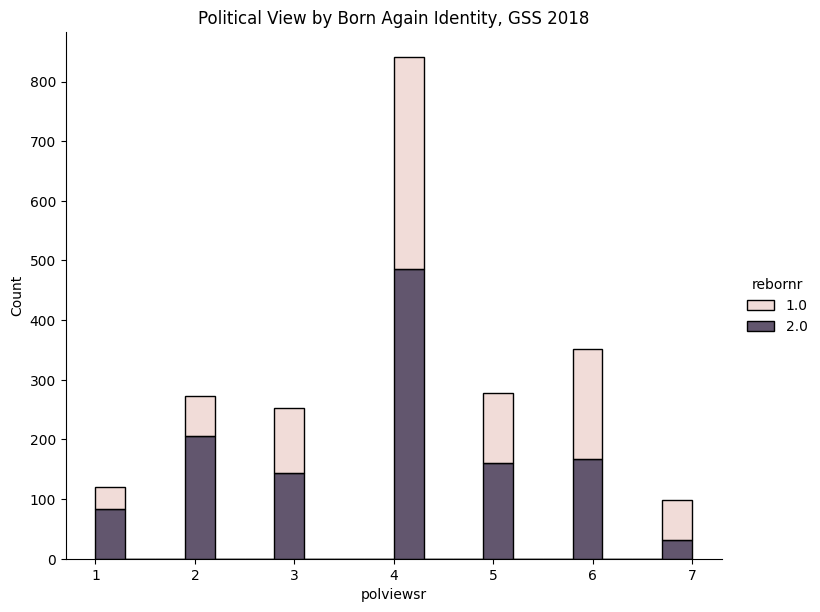

In [ ]:
p = sb.displot(GSS2018_df, x='polviewsr', hue='rebornr', multiple="stack", height=6, aspect=1.25)
plt.title('Political View by Born Again Identity, GSS 2018')
plt.show()

# **Recode categorical variables for linear model**
- Divide the survey question into 2 categories (yes/no)
- Create variable to describe the high category vs the low category
- Set the new variable to 0 and then switch it to 1 for some respondents
- Code below uses a more condensed version of the np.where statement


---


## **np.where(logical condition, value if true, value if false)**
Example: looking at who is woman and who is not
- **GSS2018_df['women'] = np.where(GSS2018_df['sex'] == 2, 1, 0)**
- logical condition = GSS2018_df['sex'] == 2 (in SPSS, women (female) is coded as 2 & male is coded as 1, so if sex is set to 2)
- value if true = 1 (If ['sex'] == 2, (TRUE) then recode it as 1
- value if false = 0 (If ['sex'] == 1, (FALSE -doesn't equal 2), then recode it as 0

In [ ]:
GSS2018_df['women'] = np.where(GSS2018_df['sex'] == 2, 1, 0)
GSS2018_df['black'] = np.where(GSS2018_df['race'] == 2, 1, 0)
GSS2018_df['rincomer'] = np.where(GSS2018_df['rincom16'] > 26, np.nan, GSS2018_df['rincom16'])
GSS2018_df['rural'] = np.where(GSS2018_df['xnorcsiz'] > 7, 1, 0)

<ipython-input-18-8c7bb21c3d52>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['women'] = np.where(GSS2018_df['sex'] == 2, 1, 0)
<ipython-input-18-8c7bb21c3d52>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['black'] = np.where(GSS2018_df['race'] == 2, 1, 0)
<ipython-input-18-8c7bb21c3d52>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

## **Use .value_counts() to check to make sure the binary variables were created**

In [ ]:
GSS2018_df['women'].value_counts()

,count
women,
1,1296
0,1052


In [ ]:
GSS2018_df['black'].value_counts()

,count
black,
0,1963
1,385


In [ ]:
GSS2018_df['rincomer'].value_counts()

,count
rincomer,
18.0,136
19.0,114
20.0,114
16.0,96
17.0,81
21.0,81
15.0,73
22.0,67
13.0,61


In [ ]:
GSS2018_df['rural'].value_counts()

,count
rural,
0,2080
1,268


## **Create linear model**

In [ ]:
# This is the same model, with the recoded DV, showing the same results.
# Linear model to predict belief in climate crisis
Y = GSS2018_df['polviewsr'] # A higher score indicates more climate crisis skepticism
X = GSS2018_df[['women', 'black', 'rincomer', 'rural', 'rebornr']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:              polviewsr   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     15.63
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           5.84e-15
Time:                        07:54:51   Log-Likelihood:                -2338.8
No. Observations:                1310   AIC:                             4690.
Df Residuals:                    1304   BIC:                             4721.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1428      0.192     26.772      0.0

## Activity

1. Download a GSS data file from the NORC. Copy the file to your Drive and read it into a data object.
2. Identify a dependent variable to explain.
3. Create one analysis and visualization related to your DV.
4. Sketch out a data story, keeping in mind the principles of DF.